<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# An introduction to Visualisations in Python - Part 2



We can categorise visualisations in Python based on the number of Variables we want to work with. By this we would have 3 major classes.



1.   Univariate Visualisations
2.   Bivariate Visualisations
3.   Multivariate Visualisations

In **An introduction to Visualisations in Python - Part 1** we explored univariate visualisations using the Prosper Loan Dataset from Kaggle.

In part 2, we would build on the concepts introduced in part 1 by logically carrying out an Eploratory Data Analysis to uncover insights on borrowers behavior from the dataset.

## A simple EDA on the Prosper Loan Dataset

Here we would be using **Visualisations** as a graphical representation of or data to analyse the data to communicate insights on the data to our target audience for decision making.

Once again let us begin by loading our importing relevant libraries, loading our dataset, and information about the columns in the dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import zipfile
import pandas as pd
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
%%capture
# the dataset we will be using is the prosper_loan_data.csv from Kaggle
# I will load this into my Pandas DataFrame

# the dataset we will be using is the prosper_loan_data.csv from Kaggle
# I will load this into my Pandas DataFrame
url = 'https://github.com/James-M-Beta/2407PTDS/raw/main/Week%207/prosperLoanData.zip'
# Download the zip file
!wget {url}
# Open the ZIP file located at "/content/prosperLoanData.zip" in read mode
with zipfile.ZipFile('/content/prosperLoanData.zip', 'r') as zip_ref:
  # Extract all contents of the ZIP file to the current directory
  zip_ref.extractall()

df = pd.read_csv('/content/prosperLoanData.csv')


In [3]:
# let's look at what the data holds

df.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


In [4]:
# Let us also create a df of the information of the fields in our dataset
var_path = "https://github.com/James-M-Beta/2407PTDS/raw/refs/heads/main/Week%207/Prosper%20Loan%20Data%20-%20Variable%20Definitions%20-%20Sheet1.csv"
var_df = pd.read_csv(var_path)

# let's have a look
var_df.head(5)

,Variable,Description
0,ListingKey,"Unique key for each listing, same value as the..."
1,ListingNumber,The number that uniquely identifies the listin...
2,ListingCreationDate,The date the listing was created.
3,CreditGrade,The Credit rating that was assigned at the tim...
4,Term,The length of the loan expressed in months.


In [5]:
def field_info(field_name):
  if field_name in var_df.Variable.unique():
    field_info = var_df[var_df['Variable'] == field_name]['Description'].tolist()[0]
    print(f"{field_name}:\n{field_info}")
  else:
    print(f"{field_name}:\nField Not found in Data")

## Univariate Visualisations.



With that loaded we can proceed to beginning an EDA of the data to uncover borrower patterns.

Let's begin with answering the question, what are the various status of loans in the dataset and how many of those statuses are there. This will utilize a univariate visualisation since we are dealing with a single variable. From the dataset we see there is a LoanStatus column, we should be able to get the information we need by creating a Visualisation of that column.  But remember we said a visual will depend on the data type. so let us first check what data type LoanStatus is and then decide what type of Visualisation will be appropriate.

In [6]:
# check get information of the LoanStatus column

df['LoanStatus'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 113937 entries, 0 to 113936
Series name: LoanStatus
Non-Null Count   Dtype 
--------------   ----- 
113937 non-null  object
dtypes: object(1)
memory usage: 890.3+ KB


In [7]:
# We can see that it is categorical data. but let see samples of the data by
# viewing the first 20 to see if it is ordinal or nominal data

df['LoanStatus'].head(20)

,LoanStatus
0,Completed
1,Current
2,Completed
3,Current
4,Current
5,Current
6,Current
7,Current
8,Current
9,Current


There does not seem to be any order to the data so we can assert that it is
norminal - without any order. our option for visualizing now are limited to barcharts, pie-charts, doughnut charts, tree map, word cloud.

Next let's check how many unique value to inform our decision further.

In [8]:
df['LoanStatus'].nunique() # this counts the number of unique values in a column

12

The effectiveness of different visualization techniques can vary significantly depending on the number of unique categories present in the data. Here’s a general guideline on how many unique values are preferable for various types of charts:

1. **Pie Charts and Doughnut Charts**:
   - **Preferable Number of Categories**: 2 to 5
   - **Reason**: Pie and doughnut charts become cluttered and hard to interpret with too many slices. They work best with a small number of categories, where the difference in proportions is clear and easily understandable.

2. **Tree Maps**:
   - **Preferable Number of Categories**: 5 to 20
   - **Reason**: Tree maps can handle a moderate number of categories effectively because they use space efficiently. Each category is represented as a rectangle that can vary in size, allowing for easy comparison of proportions. They can accommodate more categories than pie charts without losing readability.

3. **Word Clouds**:
   - **Preferable Number of Categories**: 10 to 30
   - **Reason**: Word clouds are suitable for visualizing textual data or categories in a more engaging way. They can handle many categories, with the size of each word representing its frequency. However, they become less effective and more cluttered as the number of words increases.

4. **Bar Charts**:
   - **Preferable Number of Categories**: 2 to 20+
   - **Reason**: Bar charts are versatile and can effectively display a wide range of categories. They are particularly useful for larger datasets as they can handle many categories without loss of interpretability, especially if the bars are sorted or if the chart is split into smaller grouped or stacked bar charts.

The optimal number of categories can depend on various factors, including the size and layout of the chart, the audience's familiarity with the data, and the specific visualization tool used. Generally, it's best to limit the number of categories in visualizations like pie and doughnut charts, while bar charts and tree maps can accommodate more without sacrificing clarity.

Since we have 12, **Tree Maps, WordClouds, and Bar Charts** qualify. However I would prefer the Bar Chart since it is most commonly used because of the ease of interpretation.

> let us build or first categorical univariate visualisation using the constituents we listed in Part 1, Data, visual encoding, axes and scales, labels and legends, titles and annotations, and design.

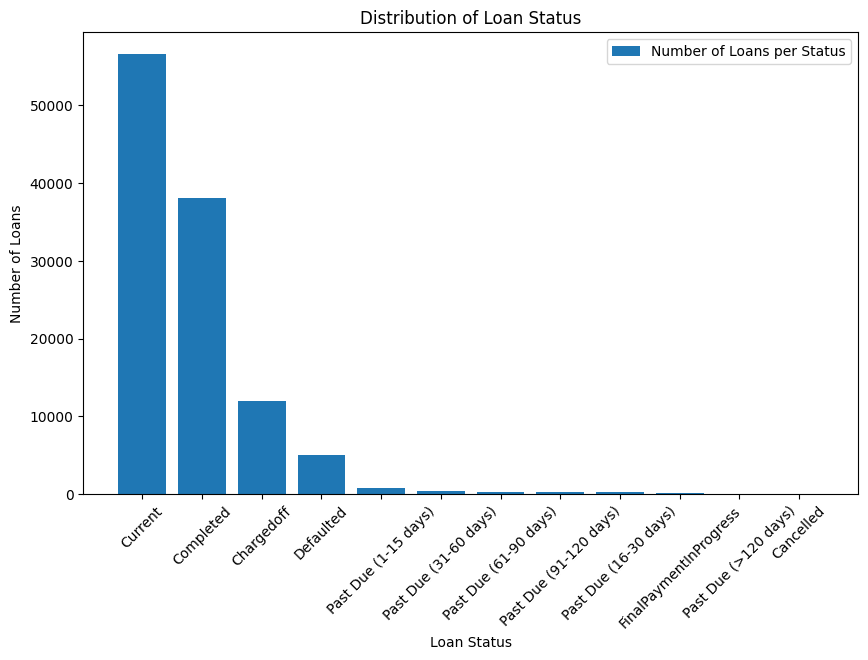

In [9]:
# first we will use Matplotlib.Pyplot (plt)
# 1. Data
loan_status_counts = df['LoanStatus'].value_counts() # creates a Pandas series
x= loan_status_counts.index # creates the x-axis
y= loan_status_counts.values # creates the y-axis

# 2. Visual Encoding
plt.figure(figsize=(10, 6))
plt.bar(x, y)  # Bar chart

# 3. Axes and Scales
plt.xticks(rotation=45)  # Control axis properties like rotation

# 4. Labels and Legends
plt.xlabel('Loan Status')  # X-axis Label
plt.ylabel('Number of Loans')  # Y-axis Label
plt.legend(['Number of Loans per Status'])  # Legend

# 5. Titles and/or Annotations
plt.title('Distribution of Loan Status')  # Title

# plt.annotate('Highest Count',
#              xy=(loan_status_counts.idxmax(), loan_status_counts.max()),
#              xytext=(loan_status_counts.idxmax(),
#                      loan_status_counts.max()*0.9),
#              arrowprops=dict(facecolor='black', shrink=0.05))  # Annotation

# 6. Design
plt.style.use('ggplot')  # Design style

plt.show()


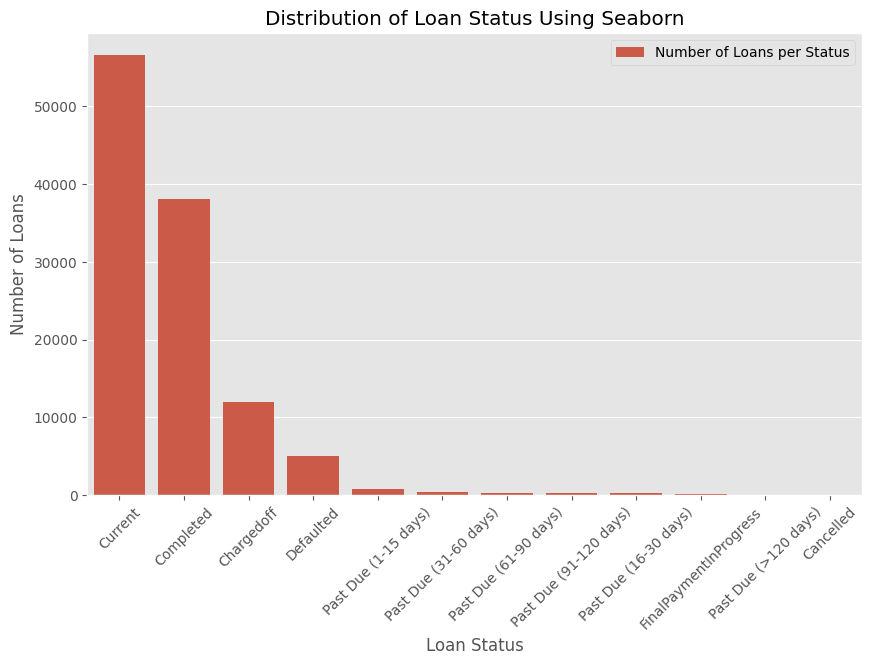

In [10]:
# Let's do the same plot using Seaborn

# 1. Data
# Data manipulation is not required here because countplot handles counting
#  internally.

# 2. Visual Encoding
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='LoanStatus',
                   data=df,
                   order=df['LoanStatus'].value_counts().index)

# 3. Axes and Scales
plt.xticks(rotation=45)

# 4. Labels and Legends
plt.xlabel('Loan Status') #label
plt.ylabel('Number of Loans') # label
plt.legend(['Number of Loans per Status'])  # Legend

# 5. Titles and/or Annotations
plt.title('Distribution of Loan Status Using Seaborn') # title

# for p in ax.patches:
#     ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
#                 textcoords='offset points') # Annotation

# 6. Design
sns.set(style="whitegrid")
plt.show()


I googled the meaning of each of the loan status above to see what each status mean and have provided it in the table below. These statuses typically reflect various stages in the life cycle of a loan, indicating both healthy repayments and various levels of delinquency. Each status is critical for managing credit risk and understanding the financial health of the loan portfolio.

| Loan Status                | Definition                                                                 |
|----------------------------|----------------------------------------------------------------------------|
| **Cancelled**              | The loan agreement was cancelled before it was fully disbursed or repaid. |
| **Chargedoff**             | The loan is written off as unrecoverable by the lender, typically after a prolonged period of non-payment. |
| **Completed**              | The loan has been fully repaid.                                           |
| **Current**                | The loan is active and payments are up-to-date.                           |
| **Defaulted**              | The loan has not been repaid and is considered a loss.                    |
| **FinalPaymentInProgress** | The final payment is being processed.                                     |
| **Past Due (1-15 days)**   | Payment is overdue by 1 to 15 days.                                       |
| **Past Due (16-30 days)**  | Payment is overdue by 16 to 30 days.                                      |
| **Past Due (31-60 days)**  | Payment is overdue by 31 to 60 days.                                      |
| **Past Due (61-90 days)**  | Payment is overdue by 61 to 90 days.                                      |
| **Past Due (91-120 days)** | Payment is overdue by 91 to 120 days.                                     |
| **Past Due (>120 days)**   | Payment is overdue by more than 120 days.                                 |


## Bivariate Visualisations



Now we see that, of all loans that are not completed (Loans with 'Current' status), A good number of the borrowers tend to pay of their loans, but there also seem to be a lot of people who tend to not pay back.

We can now investigate further, in each category of loan status, what are their ralationship with other fields in the data like Term of the loan, CreditGrade, Occupation, BorrowerAPR, BorrowerRate, etc. Remeber that once we add another variable, we would need to create Bivariate Visualisations.

For Bivariate Visualisations we would pick Two numerical columns, one Discrete - Term, and one Continous - BorrowerRate

When deciding on a visualization to represent the relationship between a nominal variable and a discrete variable, you should consider several key factors that inform your choice. Here are the main aspects to think about:

**1. Nature of the Variables**
- **Nominal Variable**: Since this is a categorical variable without a natural ordering, your visualization should clearly differentiate between categories without implying any order or hierarchy.
- **Discrete Variable**: This type of variable takes on countable values. The visualization should make it easy to compare these counts or values across different categories of the nominal variable.

**2. Purpose of the Visualization**
- **Comparison**: If the goal is to compare the discrete variable's values across the different categories of the nominal variable, a bar chart or a dot plot would be appropriate.
- **Distribution**: To show how the discrete variable is distributed across the categories, consider histograms for each category or a violin plot if the data distribution’s shape and outliers are also of interest.
- **Relationship**: To explore the relationship or correlation between the nominal and discrete variables, stacked bar charts or cluster bar charts can be effective.

**3. Audience and Context**
- The choice of visualization can also depend on the audience’s familiarity with data interpretation. Simplistic visualizations like bar charts are universally understood, whereas box plots or violin plots might require a more data-savvy audience.
- The context or environment where the visualization will be presented (e.g., interactive web platforms, static reports) can influence the choice. Interactive platforms allow for more complex visualizations that users can explore, such as drill-down pie charts or interactive histograms.

**4. Data Volume and Granularity**
- **Large datasets**: With a large amount of data, some visualizations can become cluttered or slow to render. Summarization through histograms or aggregate bar charts might be necessary.
- **Granularity**: The level of detail required in the visualization impacts the choice. For detailed analysis, you might opt for split-violin plots or faceted histograms.

Option availble to us are scatterplot, lineplot, barplot, histogram (mostly univariate but can be adapted for bivariate visualisations), boxplot, pairplot, violinplot, KDEplot, heatmap, regplot, etc


In [11]:
# First lets use our function for getting information from our data dictionary
# We will use it get the meaning of the Term and BorrowerRate

field_info('Term')
field_info('BorrowerRate')

Term:
The length of the loan expressed in months.
BorrowerRate:
The Borrower's interest rate for this loan. 


In [12]:
# This should be our second nature in visualisations, not your the audience but
#  for you the Data Scientist

df[['LoanStatus', 'Term']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   LoanStatus  113937 non-null  object
 1   Term        113937 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [13]:
# we know LoanStatus has 12 unique values, so let's check that of Term

df['Term'].nunique()

3

### Recommended Visualizations

For visualizing the relationship between a nominal variable with 12 unique values ("Loan Status") and a discrete variable with just 3 unique values ("Term of Loans"), you'll want a plot that clearly shows the distribution of the loan terms across different loan statuses. Here are a few recommendations tailored for this specific scenario:

- **Clustered Bar Chart**: Best for comparing the count of each term across different statuses.
- **Stacked Bar Chart**: Most suitable for understanding the proportion of each term within each status.
- **Heatmap**: Ideal for identifying patterns and concentrations of data points.

Since we want to see how each term is distributed across all loan status, I will be using the clustered barchart.

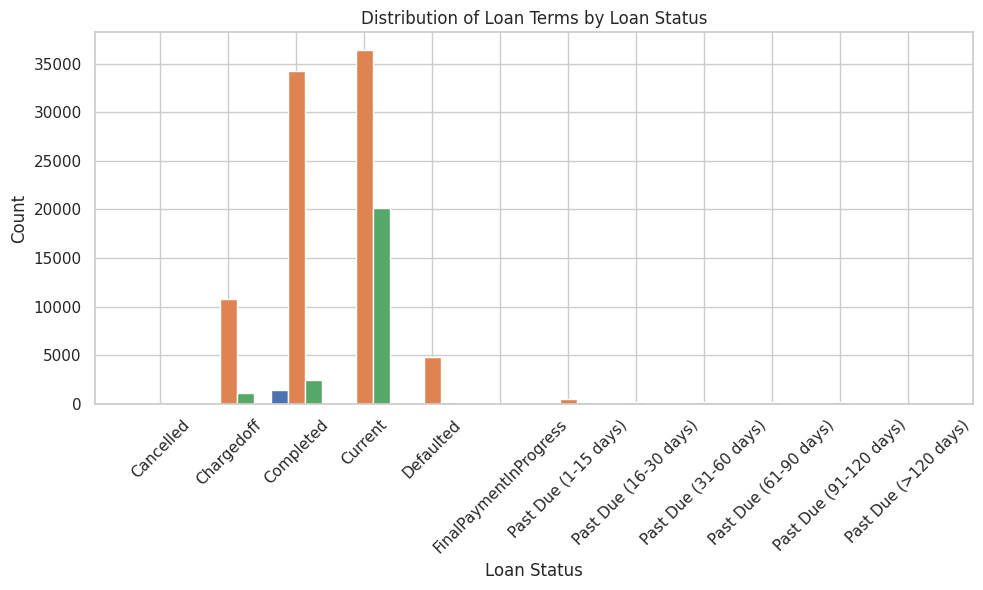

In [14]:
# Using Matplotlib.Pyplot

# 1. Data
grouped= df.groupby(['LoanStatus', 'Term']).size().unstack(fill_value=0)


# 2. Visual Encoding
fig, ax = plt.subplots(figsize=(10, 6)) # set the size of the plot
terms = grouped.columns
x = np.arange(len(grouped))  # the label locations
width = 0.25  # the width of the bars

# Generate a bar for each term
# Added the label argument in ax.bar
for i, term in enumerate(terms):
    ax.bar(x + i * width, grouped[term], width, label=term)


# 3. Axes and Scales

ax.set_xticks(x + width)
ax.set_xticklabels(grouped.index)

plt.xticks(rotation=45)  # Control axis properties like rotation

# 4. Labels and Legends
ax.set_xlabel('Loan Status') # X-axis Label
ax.set_ylabel('Count') # Y-axis Label
# ax.legend(title='Term')  # Legend

# 5. Titles and/or Annotations
ax.set_title('Distribution of Loan Terms by Loan Status')  # Title


# 6. Design
plt.style.use('ggplot')  # Design style

plt.tight_layout()

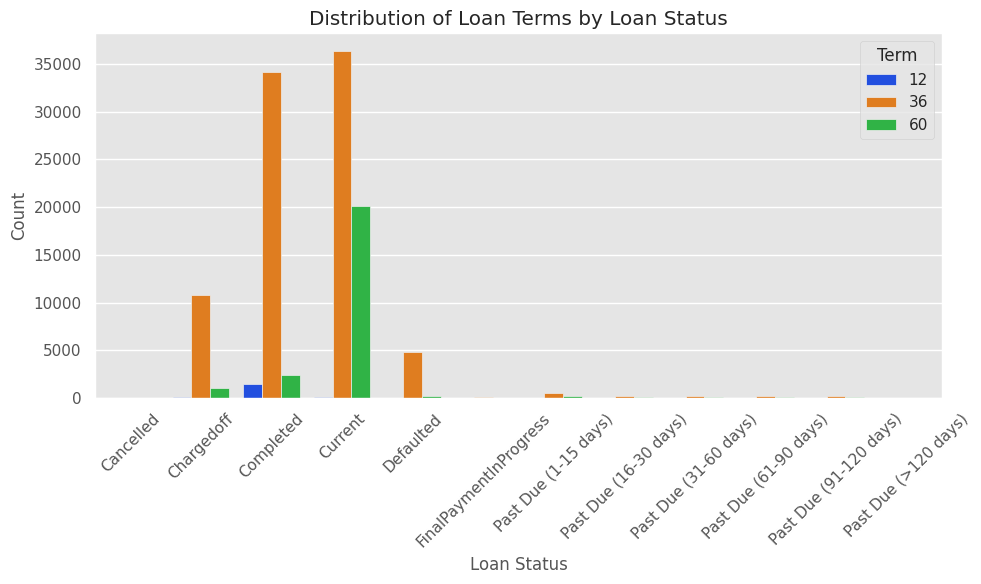

In [15]:
# Now let's do the same using Seaborn

# 1. Data
# this is handled within Seaborn, not needed

# 2. Visual Encoding
fig, ax = plt.subplots(figsize=(10, 6)) # set the size of the plot
sns.countplot(x='LoanStatus', hue='Term', data=df.sort_values('LoanStatus'), palette=sns.color_palette("bright"))

# 3. Axes and Scales
plt.xticks(rotation=45)  # Control axis properties like rotation

# 4. Labels and Legends
ax.set_xlabel('Loan Status') # X-axis Label
ax.set_ylabel('Count') # Y-axis Label
ax.legend(title='Term')  # Legend

# 5. Titles and/or Annotations
ax.set_title('Distribution of Loan Terms by Loan Status')  # Title


# 6. Design
sns.set(style="whitegrid") # for consistency

plt.tight_layout()

From the above we see that a we have a lot of 36 term loans completed, but it also has a high amount not completed (Defaulted and Chargedoff). But this seems also thesame for 60 Term loans. However we do not have a lot of 12 Months Term loans but alot seem completed. This some interesting insights, don't you think?

Let's look at the next pair - Term and BorrowerRate.

In [16]:
# Once again, lets use our function for getting information from our data
# dictionary. We will use it get the meaning of the Term and BorrowerRate

field_info('Term')
field_info('BorrowerRate')

Term:
The length of the loan expressed in months.
BorrowerRate:
The Borrower's interest rate for this loan. 


In [17]:
# Next, as Data Scientist let's get info on the two columns

df[['LoanStatus', 'BorrowerRate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   LoanStatus    113937 non-null  object 
 1   BorrowerRate  113937 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


In [18]:
# Can we check the number of unique variables in BorrowerRate

df['BorrowerRate'].nunique()

2294

Wow!!! Now that is a lot of unique values.

When dealing with a nominal variable with a manageable number of unique values (like "Loan Status" with 12 unique values) and a continuous variable with many unique values (like BorrowRate with 2294 unique values), the key is to choose visualizations that can succinctly convey the distribution or central tendency of the continuous variable across the categories defined by the nominal variable. Here are a few recommended visualization types that could be effective:


**Choosing the Best Option**
- **Box Plot or Violin Plot**: Best for when you want to visualize the distribution and identify potential outliers or skewness in the data.
- **Swarm Plot**: Useful for smaller datasets or when it's crucial to display every individual measurement.
- **Bar Plot**: Good for providing a quick summary using the mean or median to understand typical values but not the spread or distribution.

Each of these options is suited to different aspects of data analysis, depending on what you want to emphasize about the relationship between the loan status and the continuous variable.



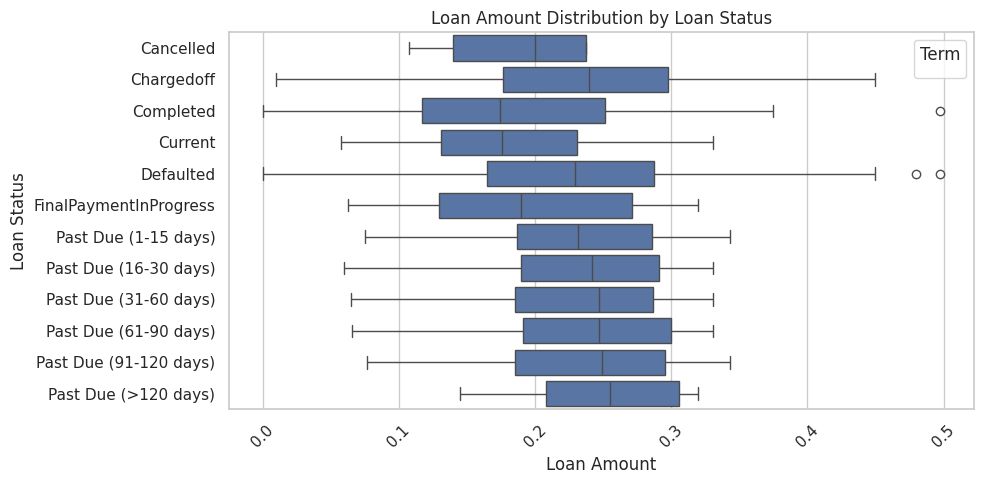

In [19]:
# Now let's do the same using Seaborn

# 1. Data
# this is handled within Seaborn, not needed

# 2. Visual Encoding
fig, ax = plt.subplots(figsize=(10, 5)) # set the size of the plot
sns.boxplot(y='LoanStatus', x='BorrowerRate', data=df.sort_values('LoanStatus'))

# 3. Axes and Scales
plt.xticks(rotation=45)  # Control axis properties like rotation

# 4. Labels and Legends
plt.ylabel('Loan Status') # X-axis Label
plt.xlabel('Loan Amount') # Y-axis Label
ax.legend(title='Term')  # Legend

# 5. Titles and/or Annotations
plt.title('Loan Amount Distribution by Loan Status')

# 6. Design
sns.set(style="whitegrid") # for consistency

plt.tight_layout()


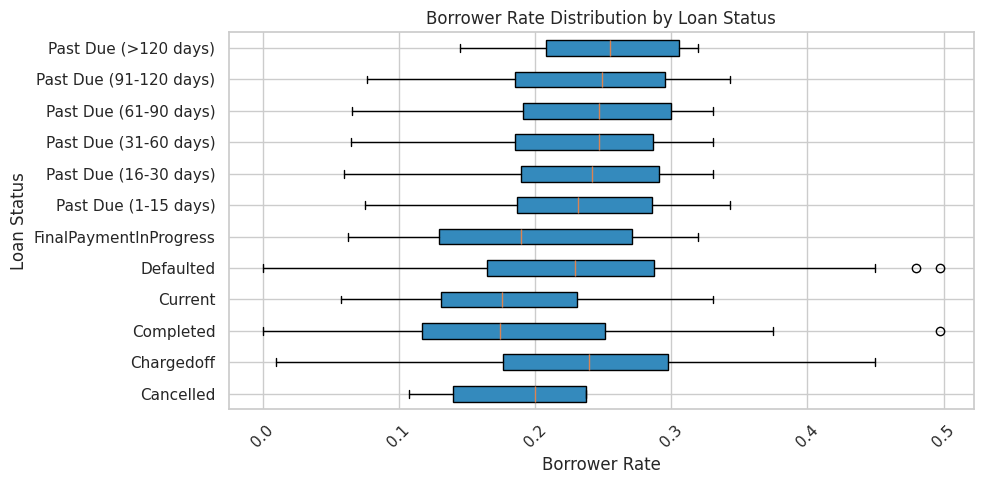

In [20]:
# Now let's try the same using matplotlib

# 1. Data
# Preparing the data: aggregating BorrowerRate by LoanStatus
unique_statuses = sorted(df['LoanStatus'].unique())
data_to_plot = [df[df['LoanStatus'] == status]['BorrowerRate'] for status in unique_statuses]

# 2. Visual Encoding
fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot(data_to_plot, vert=False, patch_artist=True)  # Create a horizontal boxplot

# 3. Axes and Scales
ax.set_yticklabels(unique_statuses)
plt.xticks(rotation=45)  # Control x-axis properties like rotation

# 4. Labels and Legends
plt.ylabel('Loan Status')  # Y-axis Label
plt.xlabel('Borrower Rate')  # X-axis Label
# No automatic legend handling here, but you could create custom annotations if needed.

# 5. Titles and/or Annotations
plt.title('Borrower Rate Distribution by Loan Status')

# 6. Design
plt.grid(True)  # Add gridlines for better readability

plt.tight_layout()  # Adjust layout to fit everything neatly


In [21]:
type(data_to_plot)

list

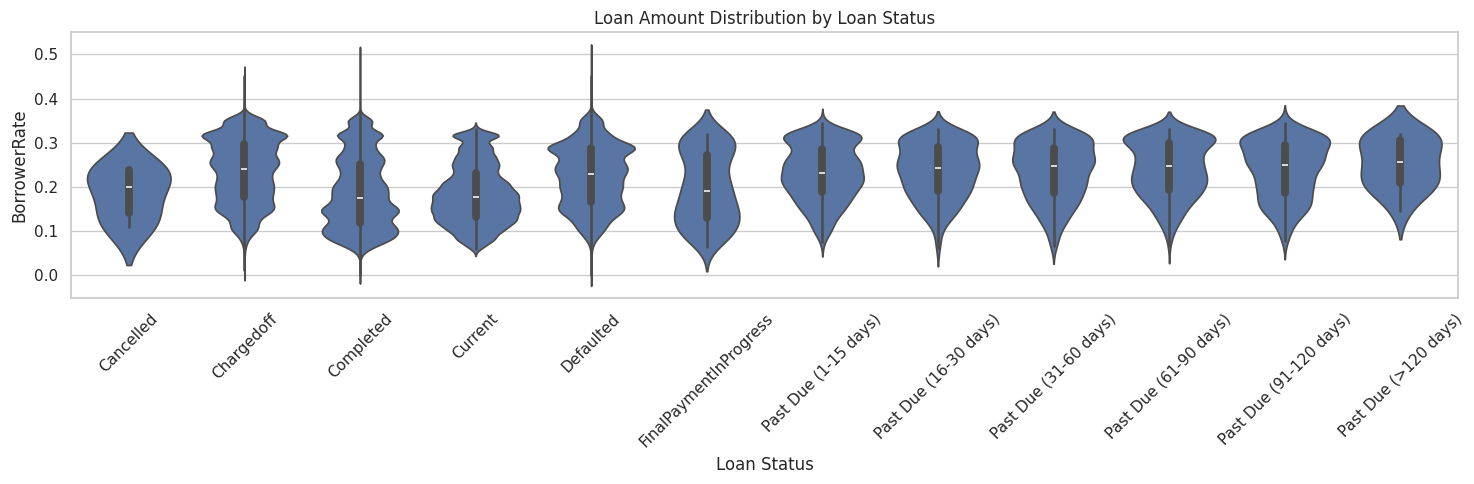

In [22]:
# Now let's do the same using Seaborn

# 1. Data
# this is handled within Seaborn, not needed

# 2. Visual Encoding
fig, ax = plt.subplots(figsize=(15, 5)) # set the size of the plot
sns.violinplot(x='LoanStatus', y='BorrowerRate', data=df.sort_values('LoanStatus'))

# 3. Axes and Scales
plt.xticks(rotation=45)  # Control axis properties like rotation

# 4. Labels and Legends
plt.xlabel('Loan Status') # X-axis Label
plt.ylabel('BorrowerRate') # Y-axis Label
# ax.legend(title='')  # Legend

# 5. Titles and/or Annotations
plt.title('Loan Amount Distribution by Loan Status')

# 6. Design
sns.set(style="whitegrid") # for consistency

plt.tight_layout()

This is interesting, I prefer the violin plot. Why? It shows me more info on how borrowers behave. But first let us see what a Violinplot shows us.

## Multivariate Visualisations



What insights can we deduce from the Violinplot of LoanStatus vs BorrowerRate.

- There is a clear boundary of 0.2 BorrowerRate that seems to determine if loans are paid back or not. This is because the median BorrowerRate of all completed loans and loans with final payment in progress all have a median of less than 0.2 BorrowerRate, while cancelled, defaulted, chargedoff or past due, all tend to have a BorrowerRate of greater than 0.2. Interesting right?

Also, we got some insight from the visualisation of LoanStatus and Term, which was:

- A lot of 36 term loans were completed but also has a high amount not completed (Defaulted and Chargedoff). Also, was also the case for 60 months Term loans. However, we did not have a lot of 12 Months Term loans but almost all was completed.

But now that we have gotten insights from both **LoanStatus vs Term** and **LoanStatus vs BorrowerRate**, would it not make sense to visualize all 3 variables?

Lets see how that will work.

In [23]:
# One more time, lets use our function for getting information from our data
# dictionary for LoanStatus, BorrowerRate, and Term

field_info('Term')
field_info('BorrowerRate')
field_info('LoanStatus')

Term:
The length of the loan expressed in months.
BorrowerRate:
The Borrower's interest rate for this loan. 
LoanStatus:
The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.


In [24]:
# Also...

df[['LoanStatus', 'Term', 'BorrowerRate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   LoanStatus    113937 non-null  object 
 1   Term          113937 non-null  int64  
 2   BorrowerRate  113937 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ MB


In [25]:
# and finally let's use a loop to count the total number of unique values in
# each column

for column in ['LoanStatus', 'Term', 'BorrowerRate']:
  print(f"{column} contains {df[column].nunique()} unique values")

LoanStatus contains 12 unique values
Term contains 3 unique values
BorrowerRate contains 2294 unique values


Since we are working with a nominal variable ("LoanStatus" with 12 unique values), a discrete variable ("Term" with 3 unique values), and a continuous variable ("BorrowerRate" with 2294 unique values), we'll want a visualization that can effectively display the distribution of the continuous variable across both the nominal and the discrete variables. below are a few visualization types that could be effective for this scenario:


**Choosing the Best Option**
- **Faceted Box Plot**: Best for detailed distribution analysis across both nominal and discrete variables separately.
- **Violin Plot**: Useful for a visual and detailed comparison of distributions across grouped categories, with the ability to see distributions for different terms overlaid.
- **Stacked Bar Plot**: Provides a quick summary using mean or median values, good for presentations or when detailed distribution information is less critical.

Since we are going for the kill, I would suggest we go for the violin plot since it gives us more detailed information.

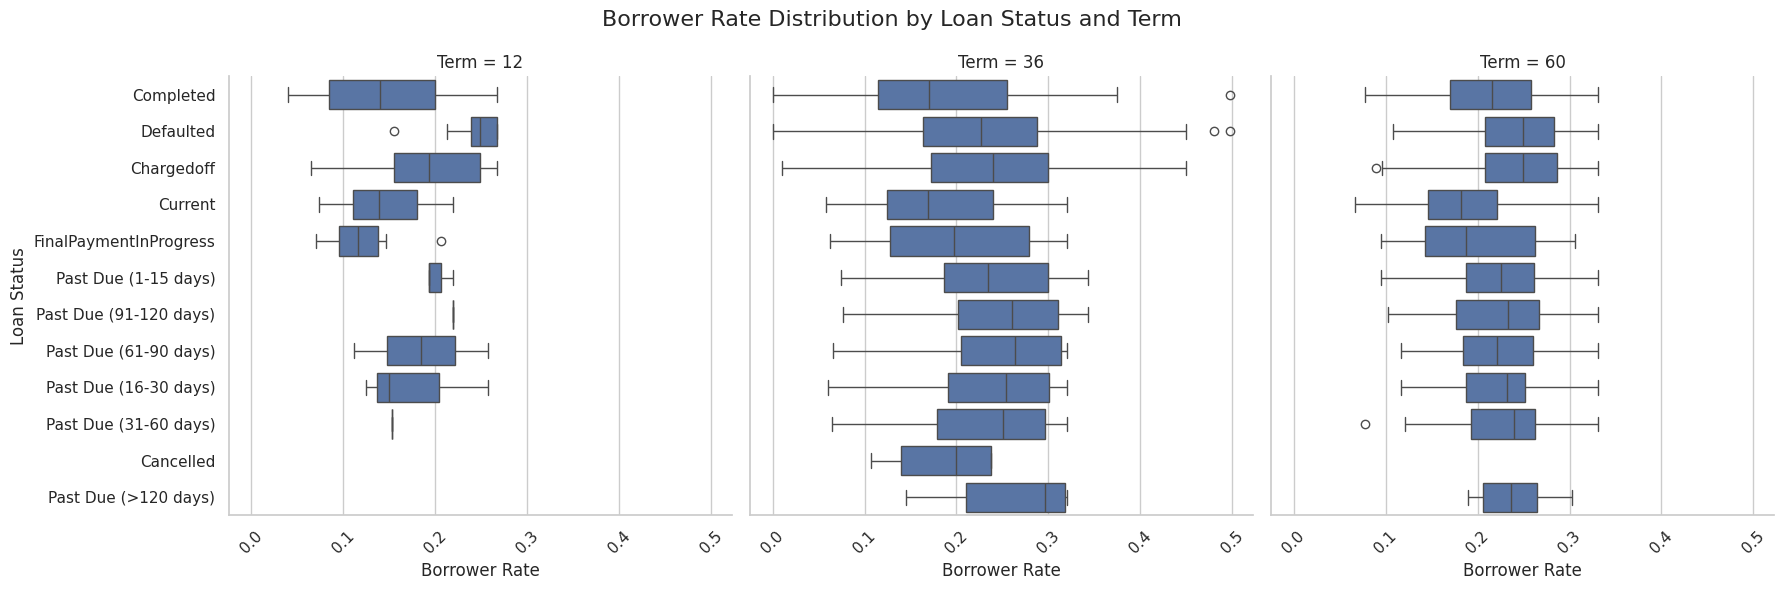

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Now let's do the same using Seaborn

# 1. Data
# this is handled within Seaborn, not needed

# 2. Visual Encoding
# Create a FacetGrid with increased height and aspect for better visibility
g = sns.FacetGrid(df, col="Term", height=6, aspect=1)
g.map_dataframe(sns.boxplot, y='LoanStatus', x='BorrowerRate')
g.fig.subplots_adjust(top=0.9)  # Adjust the top space to fit the title

# 3. Axes and Scales
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# 4. Labels and Legends
g.set_axis_labels('Borrower Rate', 'Loan Status')  # Set X and Y axis labels across all facets

# 5. Titles and/or Annotations
g.fig.suptitle('Borrower Rate Distribution by Loan Status and Term', fontsize=16)  # Set the main title

# 6. Design
sns.set(style="whitegrid")  # Apply a consistent style

plt.tight_layout()

Wow, that was a lot.<br>
With this we can see all loan Term for each LoanStatus.<br>
We can also see the interquertile ranges of the BorrowerRate of all 3 loan Term for each of the 12 LoanStatus. Is that not cool?<br>
What insights can you see from this?